In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [4]:
train_df=pd.read_csv('train_Data.csv')
train_df.head(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10 00:00:00,2016-01-15 00:00:00,2012-02-10 00:00:00,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31 00:00:00,2016-02-15 00:00:00,2012-03-31 00:00:00,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17 00:00:00,2023-02-10 00:00:00,2017-06-17 00:00:00,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29 00:00:00,2017-11-10 00:00:00,2013-11-29 00:00:00,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08 00:00:00,2015-07-05 00:00:00,2011-12-08 00:00:00,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,2011-12-19 00:00:00,2015-12-15 00:00:00,2011-12-19 00:00:00,3413012,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,2011-12-31 00:00:00,2015-12-05 00:00:00,2011-12-31 00:00:00,3553579,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
7,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,360000.0,11000.0,2012-02-09 00:00:00,2016-02-15 00:00:00,2012-02-09 00:00:00,4008234,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service
8,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,400000.0,50000.0,2012-03-29 00:00:00,2016-01-15 00:00:00,2012-03-29 00:00:00,4603217,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service
9,13,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,490000.0,10000.0,2012-03-30 00:00:00,2016-02-15 00:00:00,2012-03-30 00:00:00,4619836,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,No Top-up Service


In [5]:
test_df=pd.read_excel("test_Data.xlsx")
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,419616.0,14723.0,2012-02-29,2015-02-10,2012-02-29,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,280000.0,25350.0,2013-07-25,2014-08-10,2013-07-26,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               128655 non-null  int64  
 1   Frequency        128655 non-null  object 
 2   InstlmentMode    128655 non-null  object 
 3   LoanStatus       128655 non-null  object 
 4   PaymentMode      128655 non-null  object 
 5   BranchID         128655 non-null  int64  
 6   Area             117002 non-null  object 
 7   Tenure           128655 non-null  int64  
 8   AssetCost        128655 non-null  int64  
 9   AmountFinance    128655 non-null  float64
 10  DisbursalAmount  128655 non-null  float64
 11  EMI              128655 non-null  float64
 12  DisbursalDate    128655 non-null  object 
 13  MaturityDAte     128654 non-null  object 
 14  AuthDate         128655 non-null  object 
 15  AssetID          128655 non-null  int64  
 16  ManufacturerID   128655 non-null  int6

In [7]:
train_df.shape

(128655, 26)

In [8]:
#df['train'].fillna(0,inplace=True)
#df['test'].fillna(0,inplace=True)

In [9]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [10]:
train_df.drop(['Area','City','AuthDate'],axis=1,inplace=True)
test_df.drop(['Area','City','AuthDate'],axis=1,inplace=True)

In [17]:
import datetime
train_df['DisbursalDate']=pd.to_datetime(train_df['DisbursalDate'], format='%Y-%m-%d')
train_df['MaturityDAte']=pd.to_datetime(train_df['MaturityDAte'],format='%Y-%m-%d')

In [18]:
train_df.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         1
AssetID              0
ManufacturerID       0
SupplierID           0
LTV                  0
SEX                 59
AGE                 59
MonthlyIncome      234
State                0
ZiPCODE            372
Top-up Month         0
eligval              0
eliAsset             0
REMAssetCost         0
savings            234
dtype: int64

In [19]:
train_df[train_df['MaturityDAte'].isnull()]

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,eligval,eliAsset,REMAssetCost,savings
53392,57606,Monthly,Arrear,Closed,Billed,263,45,495000,400000.0,400000.0,0.0,2013-03-15,NaT,9510810,1046,55150,80.81,M,43.0,41666.67,MADHYA PRADESH,458880.0,No Top-up Service,396000.0,-4000.0,95000.0,41666.67


In [20]:
train_df['MaturityDAte'].fillna((train_df.MaturityDAte + pd.DateOffset(months=45)),inplace=True)
train_df['SEX'].fillna(train_df['SEX'].mode()[0],inplace=True)
train_df['AGE'].fillna(train_df['AGE'].mean(),inplace=True)
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(),inplace=True)
train_df['ZiPCODE'].fillna(train_df['ZiPCODE'].mode()[0],inplace=True)

In [21]:
test_df.isnull().sum()

ID                  0
Frequency           0
InstlmentMode       0
LoanStatus          0
PaymentMode         0
BranchID            0
Tenure              0
AssetCost           0
AmountFinance       0
DisbursalAmount     0
EMI                 0
DisbursalDate       0
MaturityDAte        0
AssetID             0
ManufacturerID      2
SupplierID          0
LTV                 0
SEX                 5
AGE                 7
MonthlyIncome      14
State               0
ZiPCODE             1
eligval             0
eliAsset            0
REMAssetCost        0
savings            14
dtype: int64

In [22]:
test_df['ManufacturerID'].fillna(test_df['ManufacturerID'].mode()[0],inplace=True)
test_df['SEX'].fillna(test_df['SEX'].mode()[0],inplace=True)
test_df['AGE'].fillna(test_df['AGE'].mean(),inplace=True)
test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].median(),inplace=True)
test_df['ZiPCODE'].fillna(test_df['ZiPCODE'].mode()[0],inplace=True)

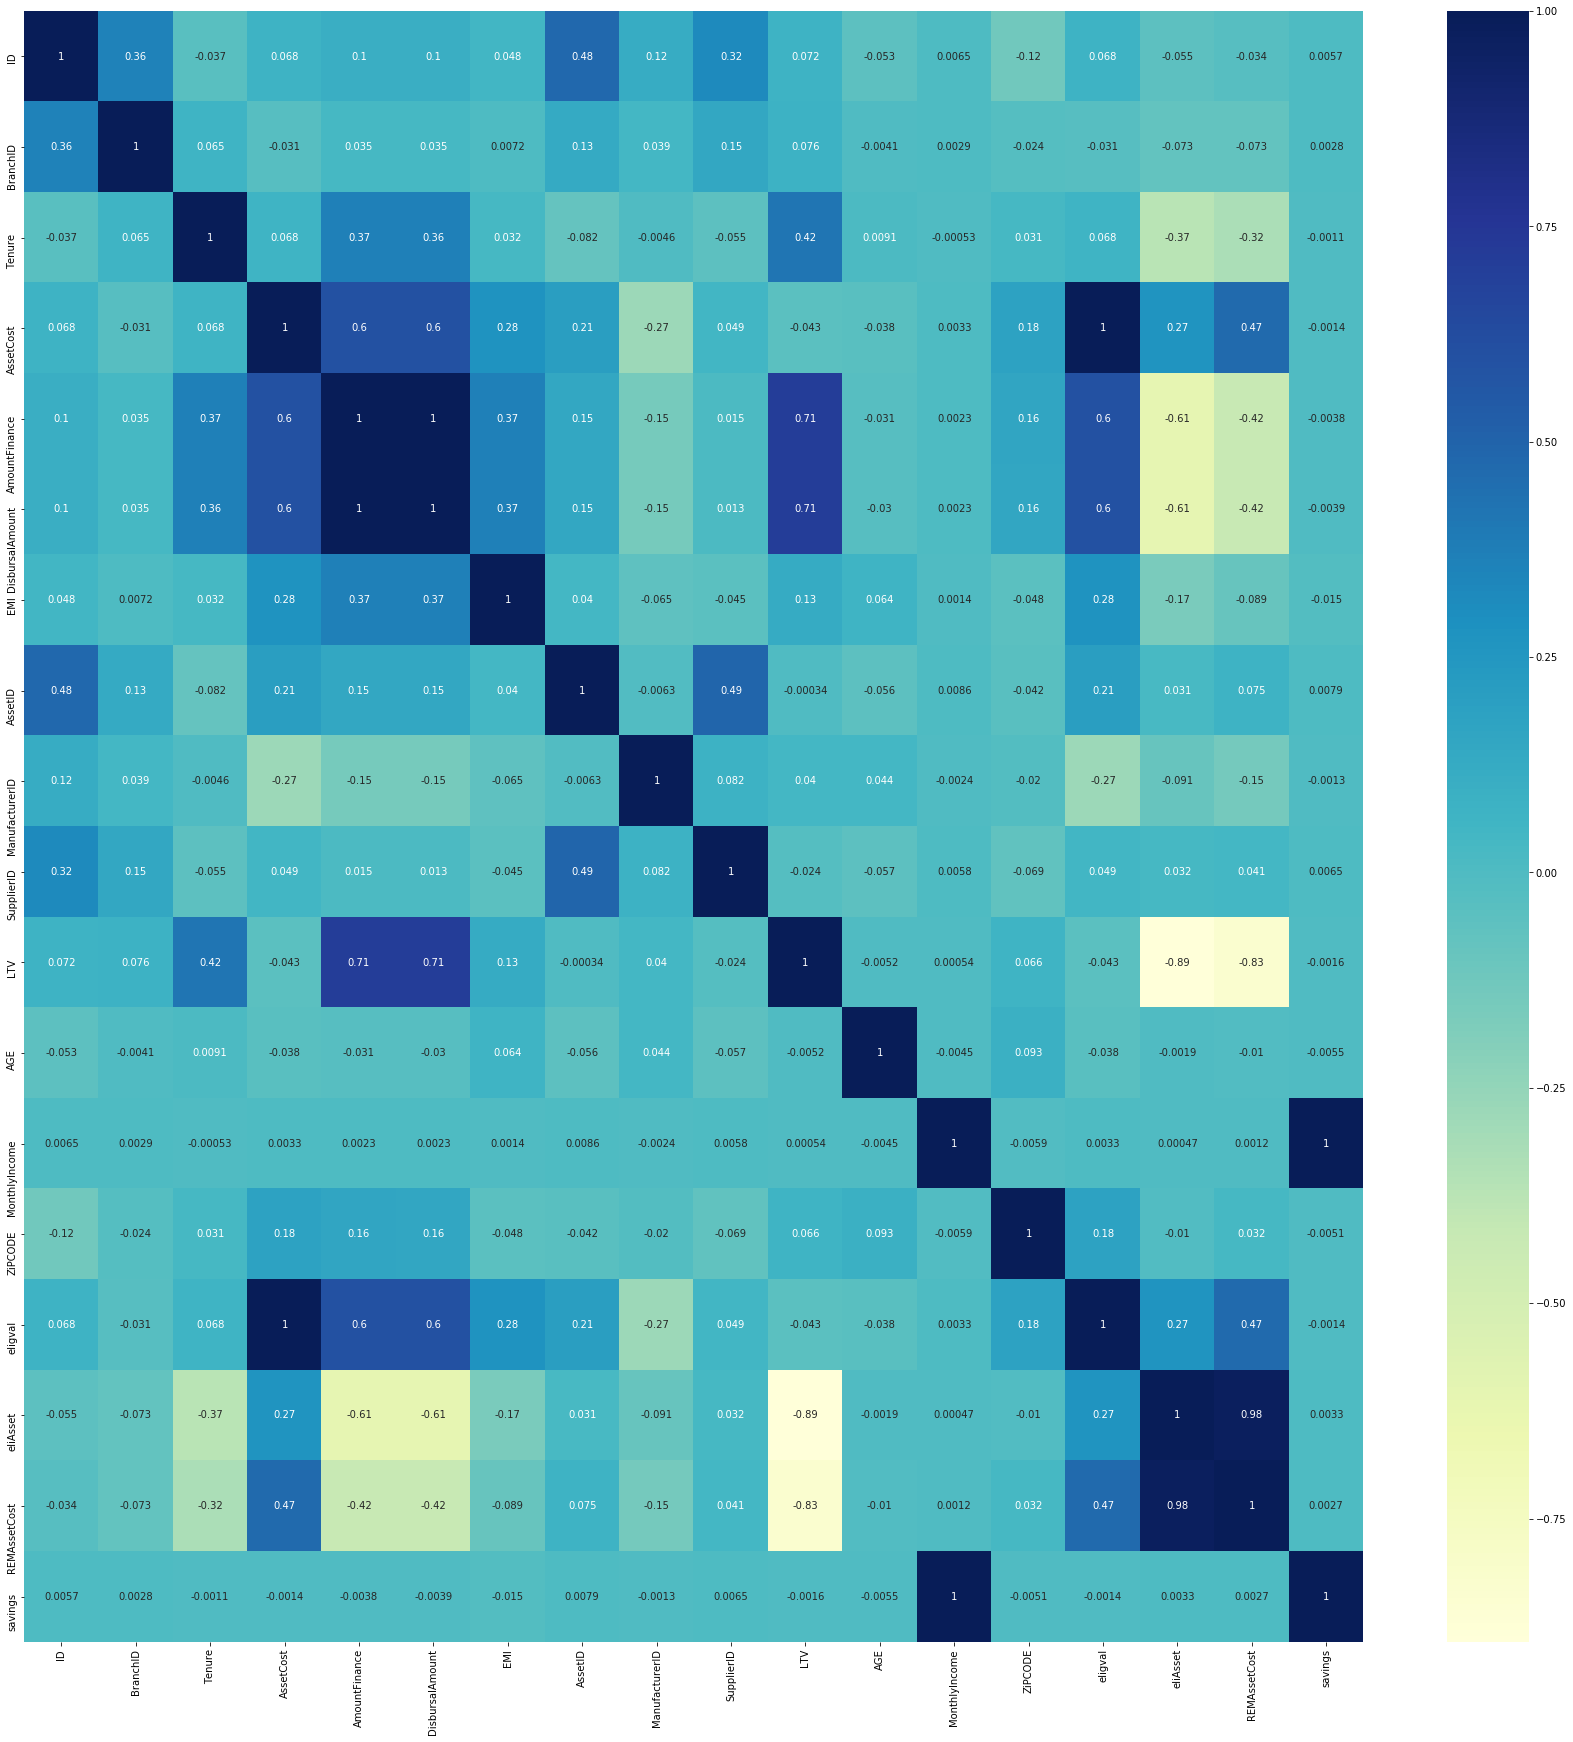

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

From the above we can see that the AccountFinance and DisbursedAmount is highly correlated with eachother, so we need to drop one of the features, and asset cost is also highly correlated as amount should be near equal to asset.

In [24]:
train_df.drop(['AmountFinance'],axis=1,inplace=True)
test_df.drop(['AmountFinance'],axis=1,inplace=True)

In [25]:
train_df['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
cat_col_mask=['Frequency','InstlmentMode','LoanStatus','PaymentMode','State','SEX']
label=['Top-up Month']
le=LabelEncoder()
for col in cat_col_mask:
    le.fit(train_df[col].unique().tolist() + test_df[col].unique().tolist())
    train_df[col]=le.transform(train_df[col])
    test_df[col]=le.transform(test_df[col])
train_df[label]=le.fit_transform(train_df[label])

In [27]:
train_df.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Tenure               0
AssetCost            0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         1
AssetID              0
ManufacturerID       0
SupplierID           0
LTV                  0
SEX                  0
AGE                  0
MonthlyIncome        0
State                0
ZiPCODE              0
Top-up Month         0
eligval              0
eliAsset             0
REMAssetCost         0
savings            234
dtype: int64

### Creating Features from Feature Engineering

train_df1=pd.read_csv("train_bureau.csv")
train_df1.head(10)

import datetime
def preprocess(df):
    df.dropna(subset=['DISBURSED-DT','REPORTED DATE - HIST'], how='all',inplace=True)
    df.sort_values(['DISBURSED-DT'],inplace=True)
    df['diff']=df.groupby('ID')['DISBURSED-DT'].diff().fillna(pd.Timedelta(seconds=0))
    df['diff_months']=df['diff'].astype('timedelta64[M]')
    df['DISBURSED-AMT/HIGH CREDIT'].fillna('0',inplace=True)
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].str.replace(',','')
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].astype('int')
    df['CURRENT-BAL'].fillna('0',inplace=True)
    df['CURRENT-BAL']=df['CURRENT-BAL'].str.replace(',','')
    df['CURRENT-BAL']=df['CURRENT-BAL'].astype('int')
    total3=df.groupby('ID').agg({'DISBURSED-AMT/HIGH CREDIT':['sum'],'DISBURSED-DT':['count'], 'CURRENT-BAL': 'sum'}).reset_index()
    total3.columns = total3.columns.droplevel(1)
    total3.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'Totalloanamount','DISBURSED-DT':'Totalloancount','CURRENT-BAL':'Totaloverdue'}, inplace=True)
    total1=df.groupby(by='ID',as_index=False)['DISBURSED-AMT/HIGH CREDIT','CURRENT-BAL','diff_months'].mean()
    total1.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'AvgCredit','CURRENT-BAL':'AvgOverdue','diff_months':'Avgdisbursal'},inplace=True)
    total2=total1.merge(total3, on='ID', how='inner')
    #total2=total1.merge(stacked, on='ID', how='inner')
    return total2

train_df1.info()

train_df.info()

#train_df1['C'] = train_df1['ID'].map(train_df.set_index('ID')['DisbursalDate'])
#train_df1

train_df1['DISBURSED-DT']=train_df1['DISBURSED-DT'].str.split(" ").str[0]
train_df1['DISBURSED-DT'].fillna(train_df1['REPORTED DATE - HIST'].str.rsplit(',').str[-2],inplace=True)
train_df1['DISBURSED-DT']=pd.to_datetime(train_df1['DISBURSED-DT'],format='%Y-%m-%d')
#train_df1 = train_df1.groupby('ID').apply(lambda x: x.loc[x['DISBURSED-DT'] <= x.C]).reset_index(drop=True)
#train_df1.drop(['C'],axis=1,inplace=True)
train_df2=preprocess(train_df1)

train_df12=train_df.merge(train_df2, on='ID', how='inner')
train_df12

train_df12.isnull().sum()

test_df1=pd.read_excel('test_bureau.xlsx')
test_df1

test_df1.isnull().sum()

test_df2=preprocess(test_df1)
test_df2

test_df12=test_df.merge(test_df2, on='ID', how='inner')
test_df12

test_df12.isnull().sum()

In [28]:
train_df['eligval'] = train_df['AssetCost']*0.80
test_df['eligval'] = test_df['AssetCost']*0.80
train_df['eliAsset'] = train_df['eligval'] - train_df['DisbursalAmount']
test_df['eliAsset'] = test_df['eligval'] - test_df['DisbursalAmount']
train_df['REMAssetCost'] = train_df['AssetCost'] - train_df['DisbursalAmount']
test_df['REMAssetCost'] = test_df['AssetCost'] - test_df['DisbursalAmount']
train_df['savings'] = train_df['MonthlyIncome'] - train_df['EMI']
test_df['savings'] = test_df['MonthlyIncome'] - test_df['EMI']
train_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,eligval,eliAsset,REMAssetCost,savings
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,2012-02-10,2016-01-15,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0,360000.0,85000.0,175000.0,11833.33
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,2012-03-31,2016-02-15,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6,388000.0,38000.0,135000.0,-9833.33
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,2017-06-17,2023-02-10,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1,552000.0,32272.0,170272.0,6957.00
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,2013-11-29,2017-11-10,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0,384000.0,-16000.0,80000.0,9233.33
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,2011-12-08,2015-07-05,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5,495412.0,55412.0,179265.0,12313.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,1,1,1,3,424,24,470000,265601.0,76800.0,2018-09-21,2020-06-05,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,3,376000.0,110399.0,204399.0,-11466.67
128651,143391,1,1,1,3,424,24,460000,275630.0,80100.0,2018-09-22,2020-06-05,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,6,368000.0,92370.0,184370.0,3233.33
128652,143393,2,1,0,3,424,23,545000,300733.0,15277.0,2018-11-23,2020-11-05,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,6,436000.0,135267.0,244267.0,233223.00
128653,143394,1,1,0,3,424,35,350000,250962.0,74341.0,2018-12-20,2021-06-05,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,6,280000.0,29038.0,99038.0,10159.00


In [29]:
from sklearn.preprocessing import KBinsDiscretizer
def binspreprocess(df1):
    age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    df1['Age'] =age_discretizer.fit_transform(df1['AGE'].values.reshape(-1,1)).astype(int)
    emi_discretizer = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='quantile')
    df1['EMI']=emi_discretizer.fit_transform(df1['EMI'].values.reshape(-1,1)).astype(int)
    tenure_discretizer = KBinsDiscretizer(n_bins=6, encode='onehot-dense', strategy='quantile')
    df1['Tenure']=tenure_discretizer.fit_transform(df1['Tenure'].values.reshape(-1,1)).astype(int)
    income_discretizer = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='quantile')
    df1['MonthlyIncome']=tenure_discretizer.fit_transform(df1['MonthlyIncome'].values.reshape(-1,1)).astype(int)
    #avgcredit_discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
    #df1['AvgCredit']=tenure_discretizer.fit_transform(df1['AvgCredit'].values.reshape(-1,1)).astype(int)
    #avgdue_discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
    #df1['AvgOverdue']=tenure_discretizer.fit_transform(df1['AvgOverdue'].values.reshape(-1,1)).astype(int)
    #vgdis_discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
    #df1['Avgdisbursal']=tenure_discretizer.fit_transform(df1['Avgdisbursal'].values.reshape(-1,1)).astype(int)
    disbursal_discretizer = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='quantile')
    df1['DisbursalAmount']=disbursal_discretizer.fit_transform(df1['DisbursalAmount'].values.reshape(-1,1)).astype(int)
    assetcost_discretizer = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='quantile')
    df1['AssetCost']=assetcost_discretizer.fit_transform(df1['AssetCost'].values.reshape(-1,1)).astype(int)
    savings_discretizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='quantile')
    df1['savings']=savings_discretizer.fit_transform(df1['savings'].values.reshape(-1,1)).astype(int)
    eligval_discretizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='quantile')
    df1['eligval']=eligval_discretizer.fit_transform(df1['eligval'].values.reshape(-1,1)).astype(int)
    eliAsset_discretizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='quantile')
    df1['eliAsset']=eliAsset_discretizer.fit_transform(df1['eliAsset'].values.reshape(-1,1)).astype(int)
    REMAssetCost_discretizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='quantile')
    df1['REMAssetCost']=REMAssetCost_discretizer.fit_transform(df1['REMAssetCost'].values.reshape(-1,1)).astype(int)
    return df1

In [30]:
train_df12=binspreprocess(train_df)
test_df12=binspreprocess(test_df)

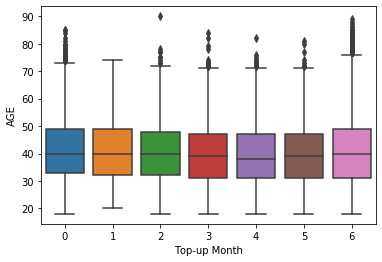

In [31]:
sns.boxplot(train_df12['Top-up Month'],train_df12['AGE'])

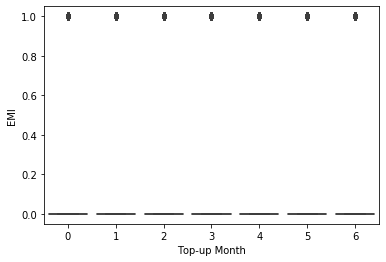

In [32]:
sns.boxplot(train_df12['Top-up Month'],train_df12['EMI'])

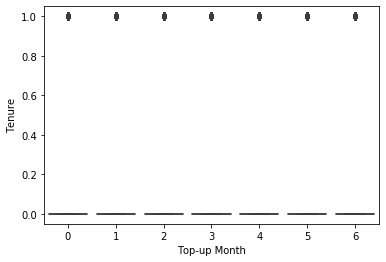

In [33]:
sns.boxplot(train_df12['Top-up Month'],train_df12['Tenure'])

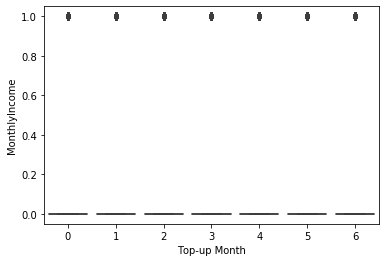

In [34]:
sns.boxplot(train_df12['Top-up Month'],train_df12['MonthlyIncome'])

In [35]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['AvgCredit'])

In [36]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['AvgOverdue'])

In [37]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['Avgdisbursal'])

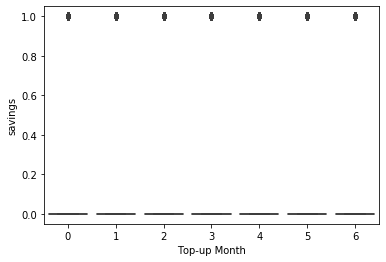

In [38]:
sns.boxplot(train_df12['Top-up Month'],train_df12['savings'])

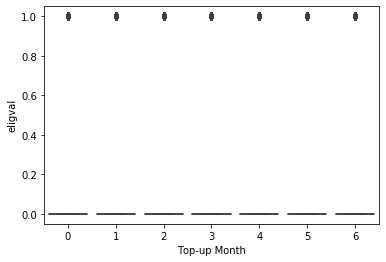

In [41]:
sns.boxplot(train_df12['Top-up Month'],train_df12['eligval'])

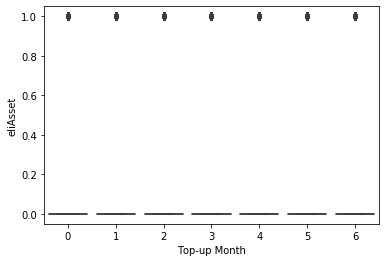

In [42]:
sns.boxplot(train_df12['Top-up Month'],train_df12['eliAsset'])

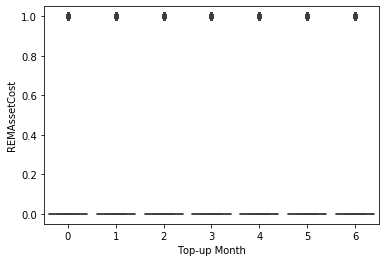

In [43]:
sns.boxplot(train_df12['Top-up Month'],train_df12['REMAssetCost'])

In [44]:
x=train_df12.drop(['Top-up Month','DisbursalDate','MaturityDAte','ID'],axis=1)
x.columns = ["".join (c if c.isalnum() else "_" for c in str(b)) for b in x.columns]

In [45]:
y=train_df12['Top-up Month']
y

0         0
1         6
2         1
3         0
4         5
         ..
128650    3
128651    6
128652    6
128653    6
128654    6
Name: Top-up Month, Length: 128655, dtype: int32

In [46]:
train_df123=x
test_df123=test_df12.drop(['DisbursalDate','MaturityDAte','ID'],axis=1)

#df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [47]:
train_df123.shape,test_df123.shape

((128655, 23), (14745, 23))

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45,shuffle=True,stratify=y)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((102924, 23), (25731, 23), (102924,), (25731,))

In [50]:
from sklearn.metrics import roc_auc_score,accuracy_score ,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 


import lightgbm as lgb
fit_params={"early_stopping_rounds":300, 
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [(x_test,y_test)],
            'eval_names': ['valid'],
            'verbose': False,
            'categorical_feature': 'auto'}

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.995, current_iter)
    return max(lr, min_learning_rate)

fit_params['callbacks'] = [lgb.reset_parameter(learning_rate=learning_rate_power_0997)]

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = []
precision = []
recall = []
f1_score = []

def calculate_metrics(y_test,y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred,average='macro')
    
    accuracy.append(acc)
    f1_score.append(f1)
    
kfold_mean=[]
kfold_max=[]

def calculate_kfold(estimator):
    f1scores = cross_val_score(estimator,x,y, cv=10)
    kfold_mean.append(f1scores.mean())
    kfold_max.append(f1scores.max())

In [68]:
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
import lightgbm as lgb

In [74]:
bbc = BalancedBaggingClassifier(random_state=44,n_estimators=20,base_estimator=lgb.LGBMClassifier(max_depth=-1, learning_rate=0.3,objective='multiclass',random_state=45,
                                                                                                   n_jobs=4, class_weight='balanced'),verbose=200)

bbc.fit(x_train, y_train) 
bbcpred=bbc.predict(x_test)
calculate_metrics(y_test, bbcpred)
calculate_kfold(bbc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for 

Building estimator 20 of 20 for this parallel run (total 20)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for th

Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 20

In [76]:
BRFC = BalancedRandomForestClassifier(n_estimators=200,random_state=44,class_weight='balanced',verbose=200,
                                      sampling_strategy='all',oob_score=True,)
BRFC.fit(x_train, y_train) 
BRFCpred=BRFC.predict(x_test)
calculate_metrics(y_test, BRFCpred)
calculate_kfold(BRFC)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining: 

building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.0s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.0s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.1s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.1s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.1s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.2s remaining:    0.0s
building tree 91 of 200
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    3.2s remaining:    0.0s
building tree 92 of 200
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    3.3s remaining:    0.0s
building tree 93 of 200
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    3.3s remaining:    0.0s
building tree 94 of 200
[Parallel(n_jobs=1)]: Done  94 out of  9

[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.0s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.0s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.0s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.1s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    6.1s remaining:    0.0s
building tree 172 of 200
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    6.2s remaining:    0.0s
building tree 173 of 200
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:    6.2s remaining:    0.0s
building tree 174 of 200
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:    6.2s remaining:    0.0s
building tree 175 of 200
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    6.3s remaining:    0.0s
building tree 176 of 200
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   

[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  9

[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 199 out of 199 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done

building tree 71 of 200
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    3.5s remaining:    0.0s
building tree 72 of 200
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    3.5s remaining:    0.0s
building tree 73 of 200
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    3.6s remaining:    0.0s
building tree 74 of 200
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    3.6s remaining:    0.0s
building tree 75 of 200
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.6s remaining:    0.0s
building tree 76 of 200
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    3.7s remaining:    0.0s
building tree 77 of 200
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    3.7s remaining:    0.0s
building tree 78 of 200
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    3.8s remaining:    0.0s
building tree 79 of 200
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    3.8s remaining:    0.0s
building tree 80 of 200
[Parallel(n_jobs=1)]: Done  80 out of  8

building tree 150 of 200
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.8s remaining:    0.0s
building tree 151 of 200
[Parallel(n_jobs=1)]: Done 151 out of 151 | elapsed:    6.8s remaining:    0.0s
building tree 152 of 200
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    6.8s remaining:    0.0s
building tree 153 of 200
[Parallel(n_jobs=1)]: Done 153 out of 153 | elapsed:    6.9s remaining:    0.0s
building tree 154 of 200
[Parallel(n_jobs=1)]: Done 154 out of 154 | elapsed:    6.9s remaining:    0.0s
building tree 155 of 200
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    7.0s remaining:    0.0s
building tree 156 of 200
[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed:    7.0s remaining:    0.0s
building tree 157 of 200
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    7.1s remaining:    0.0s
building tree 158 of 200
[Parallel(n_jobs=1)]: Done 158 out of 158 | elapsed:    7.1s remaining:    0.0s
building tree 159 of 200
[Parallel(n_jobs=1)]: Done 159

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 10

building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
building tree 10 of 200
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 81 of 200
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    3.2s remaining:    0.0s
building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    3.3s remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.3s remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.3s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.4s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.4s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.5s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.5s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.6s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  9

building tree 160 of 200
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    6.5s remaining:    0.0s
building tree 161 of 200
[Parallel(n_jobs=1)]: Done 161 out of 161 | elapsed:    6.5s remaining:    0.0s
building tree 162 of 200
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    6.6s remaining:    0.0s
building tree 163 of 200
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    6.6s remaining:    0.0s
building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.6s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.7s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.7s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.8s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.8s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169

[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 10

building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
building tree 10 of 200
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.3s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.4s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.4s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.5s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.5s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.6s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.6s remaining:    0.0s
building tree 91 of 200
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    3.6s remaining:    0.0s
building tree 92 of 200
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    3.7s remaining:    0.0s
building tree 93 of 200
[Parallel(n_jobs=1)]: Done  93 out of  9

building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.7s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.8s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.8s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.9s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.9s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    6.9s remaining:    0.0s
building tree 172 of 200
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    7.0s remaining:    0.0s
building tree 173 of 200
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:    7.0s remaining:    0.0s
building tree 174 of 200
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:    7.1s remaining:    0.0s
building tree 175 of 200
[Parallel(n_jobs=1)]: Done 175

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 108 out of 10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining: 

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    3.4s remaining:    0.0s
building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    3.5s remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.5s remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.6s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.6s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.6s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.7s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.7s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.8s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.8s rem

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    6.6s remaining:    0.0s
building tree 163 of 200
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    6.7s remaining:    0.0s
building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.7s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.8s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.8s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.8s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.9s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.9s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.9s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:   

[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining: 

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    3.1s remaining:    0.0s
building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    3.1s remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.2s remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.2s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.2s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.3s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.3s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.3s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.4s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.4s rem

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    6.5s remaining:    0.0s
building tree 163 of 200
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    6.5s remaining:    0.0s
building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.6s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.6s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.6s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.7s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.7s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.8s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.8s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:   

[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining: 

building tree 81 of 200
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    3.2s remaining:    0.0s
building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    3.3s remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.3s remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.4s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.4s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.5s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.5s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.6s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.6s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  9

building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.7s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.7s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.7s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.8s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.8s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.9s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.9s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    6.9s remaining:    0.0s
building tree 172 of 200
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    7.0s remaining:    0.0s
building tree 173 of 200
[Parallel(n_jobs=1)]: Done 173

[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining: 

building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.2s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.3s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.3s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.4s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.4s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.4s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.5s remaining:    0.0s
building tree 91 of 200
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    3.5s remaining:    0.0s
building tree 92 of 200
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    3.6s remaining:    0.0s
building tree 93 of 200
[Parallel(n_jobs=1)]: Done  93 out of  9

[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.6s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.7s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.7s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.8s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.8s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    6.9s remaining:    0.0s
building tree 172 of 200
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    6.9s remaining:    0.0s
building tree 173 of 200
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:    6.9s remaining:    0.0s
building tree 174 of 200
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:    7.0s remaining:    0.0s
building tree 175 of 200
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 108 out of 10

building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
building tree 10 of 200
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.4s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.4s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.4s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.5s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.5s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.6s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.6s remaining:    0.0s
building tree 91 of 200
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    3.6s remaining:    0.0s
building tree 92 of 200
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    3.7s remaining:    0.0s
building tree 93 of 200
[Parallel(n_jobs=1)]: Done  93 out of  9

[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    6.6s remaining:    0.0s
building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.6s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.7s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.7s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.7s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.8s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.8s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.9s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    6.9s remaining:    0.0s
building tree 172 of 200
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:   

[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 109 out of 109 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 11

building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
building tree 10 of 200
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    3.2s remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.2s remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.3s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.3s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.4s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.4s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.4s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.5s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.5s remaining:    0.0s
building tree 91 of 200
[Parallel(n_jobs=1)]: Done  91 out of  9

building tree 162 of 200
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    6.4s remaining:    0.0s
building tree 163 of 200
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    6.4s remaining:    0.0s
building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.5s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.5s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.6s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.6s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.7s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.7s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.7s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 10

building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
building tree 10 of 200
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.2s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.2s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.3s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.3s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.3s remaining:    0.0s
building tree 89 of 200
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.4s remaining:    0.0s
building tree 90 of 200
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.4s remaining:    0.0s
building tree 91 of 200
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    3.5s remaining:    0.0s
building tree 92 of 200
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    3.5s remaining:    0.0s
building tree 93 of 200
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    3.5s rem

building tree 164 of 200
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.3s remaining:    0.0s
building tree 165 of 200
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.4s remaining:    0.0s
building tree 166 of 200
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    6.4s remaining:    0.0s
building tree 167 of 200
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:    6.4s remaining:    0.0s
building tree 168 of 200
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    6.5s remaining:    0.0s
building tree 169 of 200
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    6.5s remaining:    0.0s
building tree 170 of 200
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.6s remaining:    0.0s
building tree 171 of 200
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    6.6s remaining:    0.0s
building tree 172 of 200
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    6.6s remaining:    0.0s
building tree 173 of 200
[Parallel(n_jobs=1)]: Done 173

[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  9

In [88]:
eec = EasyEnsembleClassifier(random_state=42,base_estimator=lgb.LGBMClassifier(max_depth=-1, learning_rate=0.3,objective='multiclass',random_state=45,
                                                                                                   n_jobs=4,n_estimators=1899, class_weight='balanced'),verbose=200,sampling_strategy='all')

eec.fit(x_train, y_train) 
eecpred=eec.predict(x_test)
calculate_metrics(y_test, eecpred)
calculate_kfold(eec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9

Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for th

In [91]:
RUBC = RUSBoostClassifier(random_state=44,base_estimator=lgb.LGBMClassifier(max_depth=-1, learning_rate=0.3,objective='multiclass',random_state=45,
                                                                                                   n_jobs=4,n_estimators=1899, class_weight='balanced'),sampling_strategy='all')
RUBC.fit(x_train, y_train) 
RUBCpred=RUBC.predict(x_test)
calculate_metrics(y_test, RUBCpred)
calculate_kfold(RUBC)

KeyboardInterrupt: 

In [92]:
print(f1_score)

[0.2138732991895263, 0.2138732991895263, 0.18518969219503914, 0.20985568389841167, 0.20367954632948684, 0.19611982888444837]


In [97]:
#test_df123=test_df12.drop(['ID','DisbursalDate','MaturityDAte'],axis=1)
predict=le.inverse_transform(bbc.predict(test_df123))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


In [98]:
test_df12['Top-up Month']=predict

In [99]:
df_out=test_df12[['ID','Top-up Month']]
df_out.to_csv('prediction9.csv',index=False)